In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()


,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr=df["Ground Temperature"].quantile(0.75)-df["Ground Temperature"].quantile(0.25)
iqr
uth=df["Ground Temperature"].quantile(0.75)+iqr*1.5
lth=df["Ground Temperature"].quantile(0.25)-iqr*1.5

print("UTH: ",uth,"\nLTH: ",lth)

UTH:  98.4 
LTH:  58.400000000000006


Text(0.5, 1.0, 'GroundTemp Vs Chirps/Second')

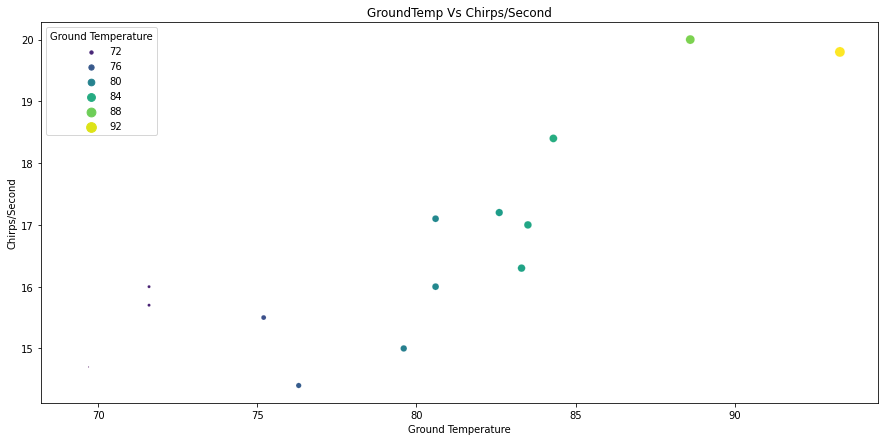

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Chirps/Second',x='Ground Temperature',hue='Ground Temperature',size='Ground Temperature',sizes=(0,100),palette="viridis")
plt.title('GroundTemp Vs Chirps/Second')

Text(0.5, 1.0, 'GroundTemp Vs Chirps/Second')

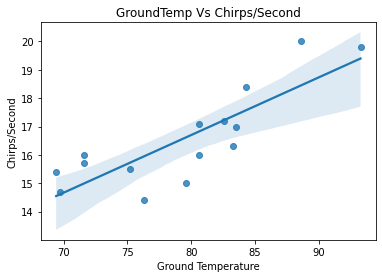

In [ ]:
# 2. Chart the original data and the equation on the chart.
sns.regplot(data=df,y='Chirps/Second',x='Ground Temperature')
plt.title('GroundTemp Vs Chirps/Second')

In [ ]:
df.corr()


,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
y=df.loc[:,['Chirps/Second']].values
x=df.loc[:,['Ground Temperature']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=77)
print(x_train,"\n\n",y_train,"\n\n",x_test,"\n\n",y_test)

[[80.6]
 [79.6]
 [71.6]
 [88.6]
 [69.4]
 [75.2]
 [82.6]
 [83.5]
 [80.6]
 [71.6]] 

 [[16. ]
 [15. ]
 [16. ]
 [20. ]
 [15.4]
 [15.5]
 [17.2]
 [17. ]
 [17.1]
 [15.7]] 

 [[76.3]
 [69.7]
 [93.3]
 [83.3]
 [84.3]] 

 [[14.4]
 [14.7]
 [19.8]
 [16.3]
 [18.4]]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(x_train)
# x_train=scaler.transform(x_train)
# x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
c=reg.intercept_  # value of the intercept c
c

array([2.41429014])

In [ ]:
m=reg.coef_ # Value of the coefficient m
m

array([[0.17969756]])

In [ ]:
reg.predict([[95]])

array([[19.48555832]])

In [ ]:
y_predict=reg.predict(x_test)
y_predict


array([[16.12521395],
       [14.93921006],
       [19.18007247],
       [17.38309687],
       [17.56279443]])

In [ ]:
from sklearn import metrics
reg.score(x_test,y_test)

0.7588888839075189

In [ ]:
gdTemp=(18-c)/m
gdTemp

array([[86.73300782]])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

### **Answers to the questions in Task:**
1. Equation of the model: y=0.179*x+2.414
2. For chart please look at cell number 12.
3. R^2 = 0.758
4. @ temperature 95, rate of chirps is approximated to be 19.48
5. @ 18 chirps/second the ground temperature is approximated to be 86.73 degrre Fornheit.

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
len(df.Body.unique())

59

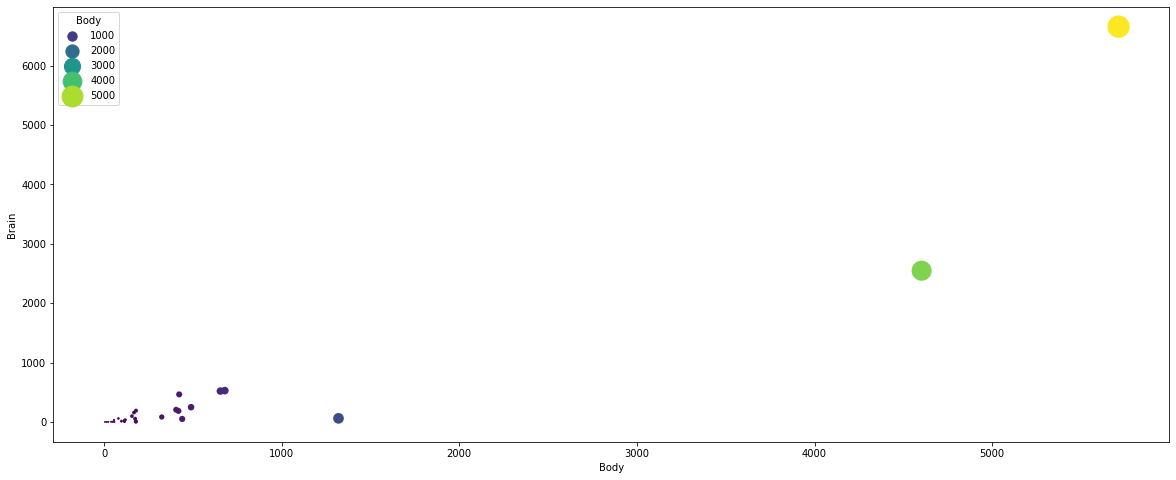

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x="Body",y="Brain",hue="Body",size="Body",sizes=(0,500),palette='viridis')

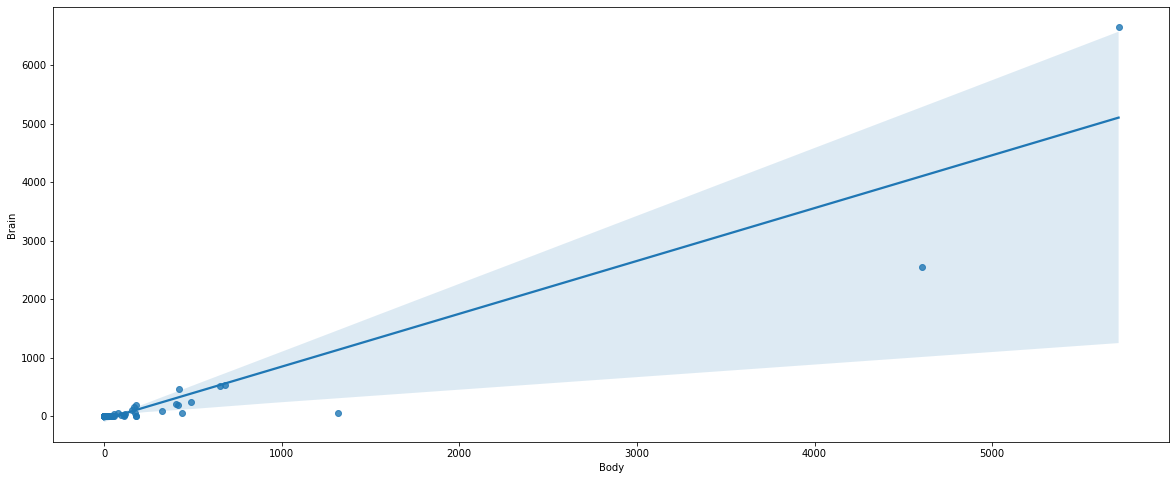

In [ ]:
plt.figure(figsize=(20,8))
sns.regplot(data=df,x="Body",y="Brain")


In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
iqr=df["Body"].quantile(0.75)-df["Body"].quantile(0.25)
iqr
uth=df["Body"].quantile(0.75)+iqr*1.5
lth=df["Body"].quantile(0.25)-iqr*1.5

print("UTH: ",uth,"\nLTH: ",lth)

UTH:  408.625 
LTH:  -238.375


In [ ]:
iqr=df["Brain"].quantile(0.75)-df["Brain"].quantile(0.25)
iqr
uth=df["Brain"].quantile(0.75)+iqr*1.5
lth=df["Brain"].quantile(0.25)-iqr*1.5

print("UTH: ",uth,"\nLTH: ",lth)

UTH:  119.60625 
LTH:  -70.80375000000001


In [ ]:
# df=df.drop_duplicates(subset=['Brain'])

In [ ]:
# df.shape[0]-len(df.Brain.unique())

0

In [ ]:
# df=df.drop_duplicates(subset=['Body'])


In [ ]:
# df.shape[0]-len(df.Body.unique())

0

In [ ]:
y=df.loc[:,['Brain']].values
x=df.loc[:,['Body']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# print(x_train,"\n\n",y_train,"\n\n",x_test,"\n\n",y_test)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(x_train)
# x_train=scaler.transform(x_train)
# x_test=scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
c=reg.intercept_
c

array([-65.50858001])

In [ ]:
m=reg.coef_
m

array([[0.90662839]])

In [ ]:
from sklearn import model_selection
reg.score(x_test,y_test)

0.7740031990674509

### **Answers to the questions in Task:**
1. y = 0.906(x)*(-65.508)
2. Chart is ploted in above cells.
3. R^2 = 0.774

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
features=['Sex','Rank','Year',"Degree",'YSdeg']


In [ ]:
def outliers(var):
  iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
  iqr
  uth=df[var].quantile(0.75)+iqr*1.5
  lth=df[var].quantile(0.25)-iqr*1.5

  print("UTH: ",uth,"\nLTH: ",lth)

  for x in df[var][:]:
    if(x>uth or x<lth):
     df[var] = df[var].clip(lth,uth)


In [ ]:
outliers(features[4])

UTH:  48.0 
LTH:  -18.0


#### EDA

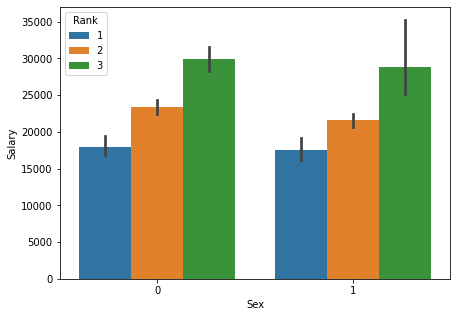

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Sex',y='Salary',hue='Rank')


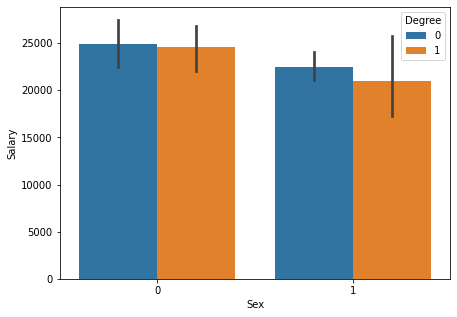

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Sex',y='Salary',hue='Degree')


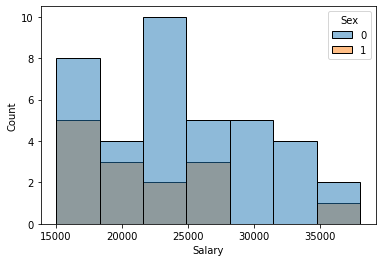

In [ ]:
sns.histplot(data=df,x="Salary",hue='Sex') # 0-male

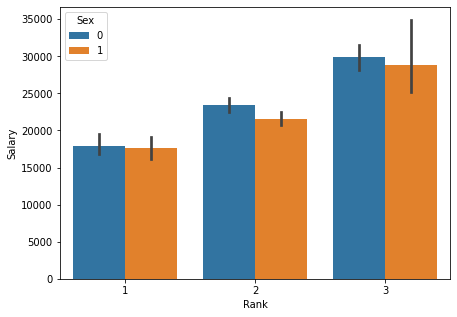

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Rank',y='Salary',hue='Sex')


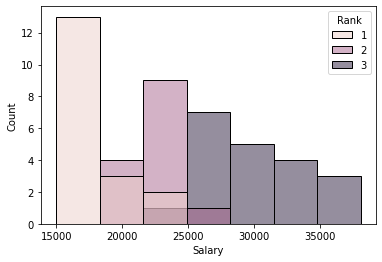

In [ ]:
sns.histplot(data=df,x="Salary",hue='Rank')


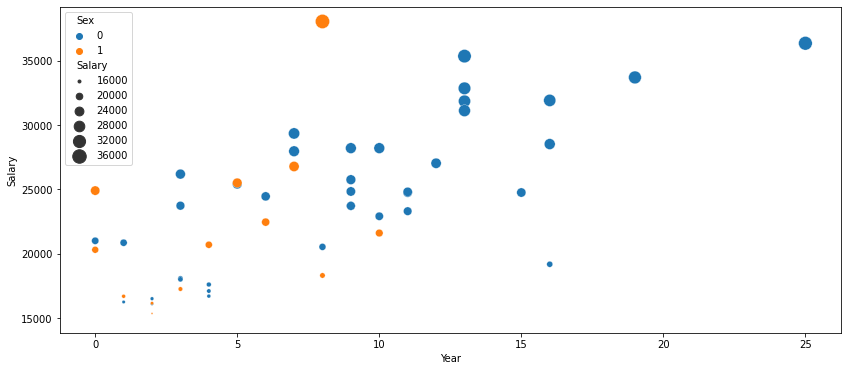

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x='Year',y="Salary",hue="Sex",size='Salary',sizes=(0,200))

Text(0.5, 1.0, 'Number of years in current rank Vs Salary')

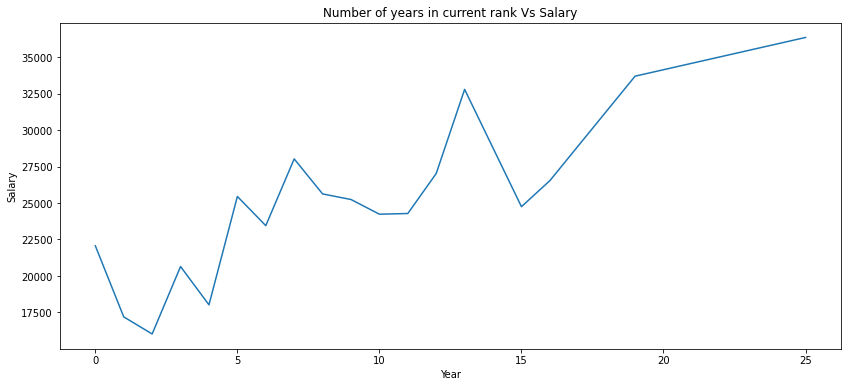

In [ ]:
plt.figure(figsize=(14,6))

df.groupby('Year')['Salary'].mean().plot()
plt.ylabel("Salary")
plt.title("Number of years in current rank Vs Salary")

In [ ]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


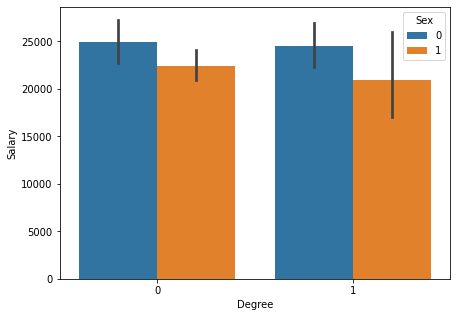

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Degree',y='Salary',hue='Sex')


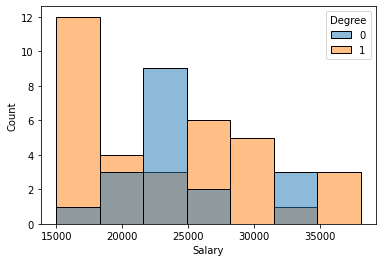

In [ ]:
sns.histplot(data=df,x="Salary",hue='Degree')


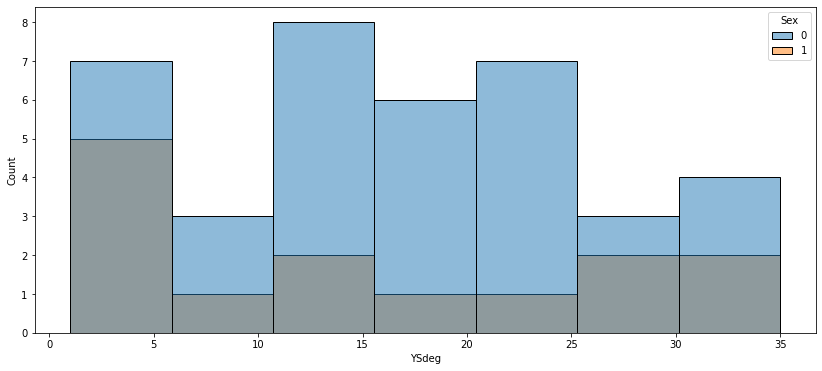

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df,x='YSdeg',hue='Sex')

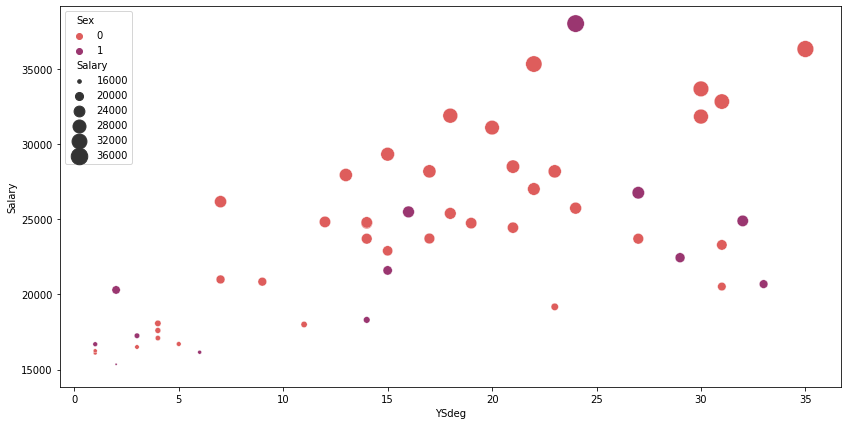

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df,x='YSdeg',y="Salary",hue="Sex",size='Salary',sizes=(0,300),palette='flare')

Text(0.5, 1.0, 'Years since highest degree was earned Vs Salary')

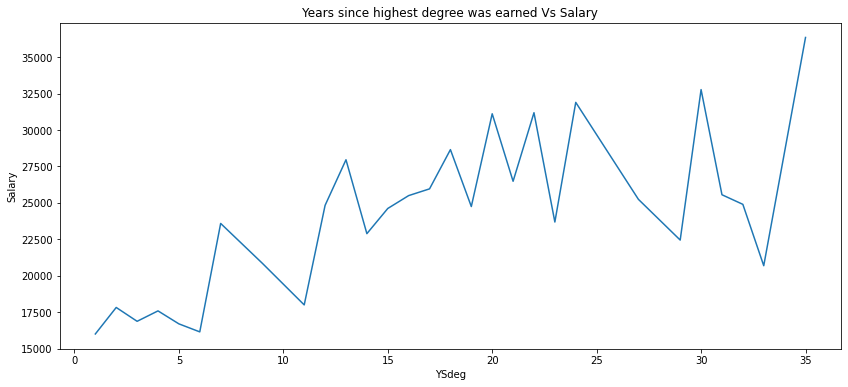

In [ ]:
plt.figure(figsize=(14,6))

df.groupby('YSdeg')['Salary'].mean().plot()
plt.ylabel("Salary")
plt.title("Years since highest degree was earned Vs Salary")

In [ ]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


Text(0.5, 1.0, 'Year Vs Salary')

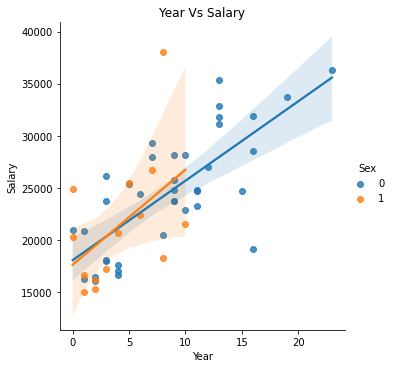

In [ ]:
sns.lmplot(data=df,x='Year',y='Salary',hue='Sex')
plt.title("Year Vs Salary")

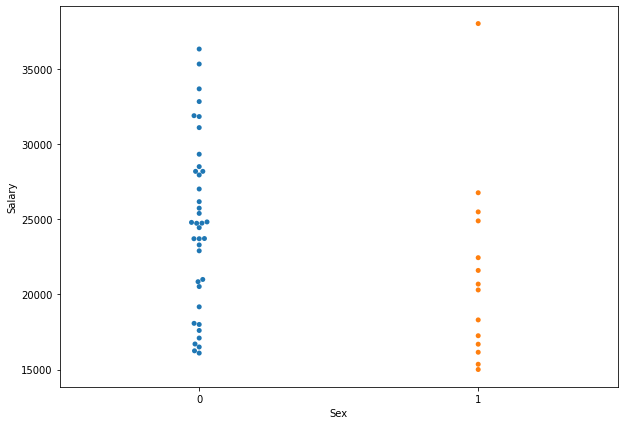

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot(data=df,x='Sex',y="Salary")


In [ ]:
x=df[['Sex','Rank','Year',"Degree",'YSdeg']].values
y=df['Salary'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### Model training

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(reg.coef_,["sex",'Rank',"Year",'Degree','YSdeg'],columns=['Coefficient'])
coeff_df

,Coefficient
sex,616.995620
Rank,4631.747371
Year,2634.892971
Degree,-410.757565
YSdeg,-966.381951


In [ ]:
reg.intercept_

24024.951219512193

In [ ]:
y_pred=x_test_scaled

In [ ]:
reg.predict(y_pred)

array([16072.48135095, 28280.12427394, 17135.79295018, 25309.93615529,
       25097.66831494, 30514.04910688, 20123.53703422, 16854.714891  ,
       32296.83560392, 16463.59812098, 22458.22738168])

In [ ]:
from sklearn import metrics
#print("R2 Score: ",metrics.r2_score(y_test,y_pred))
reg.score(x_test_scaled,y_test)


0.9059140890050276

In [85]:
import itertools as it
def input_combis(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [88]:
combis = input_combis(features)


In [89]:
def combis_r2scores( all_combis, df, target_var='Salary'):
    combi_scores = {}
    for i in range(len(list(all_combis))):
        for j in list(all_combis[i]):
            X = df[list(j)]
            Y = df['Salary']
            model = LinearRegression().fit(X,Y)
            combi_scores[model.score(X,Y)] = j
    return combi_scores

In [91]:
combis_r2scores(combis,df,'Salary')


{0.06389892583288004: ('Sex',),
 0.7525360539274633: ('Rank',),
 0.49093702676921624: ('Year',),
 0.004861680984748373: ('Degree',),
 0.45542813458360276: ('YSdeg',),
 0.7554917749443394: ('Sex', 'Rank'),
 0.4911360941886388: ('Sex', 'Year'),
 0.06643739842018881: ('Sex', 'Degree'),
 0.4930479271966782: ('Sex', 'YSdeg'),
 0.8436480933264597: ('Rank', 'Year'),
 0.7557961688386643: ('Rank', 'Degree'),
 0.7623948189698249: ('Rank', 'YSdeg'),
 0.4919014149016441: ('Year', 'Degree'),
 0.5782019226431887: ('Year', 'YSdeg'),
 0.5409662288237875: ('Degree', 'YSdeg'),
 0.8454319861987166: ('Sex', 'Rank', 'Year'),
 0.7583144768153613: ('Sex', 'Rank', 'Degree'),
 0.7666122610227071: ('Sex', 'Rank', 'YSdeg'),
 0.49207944757472966: ('Sex', 'Year', 'Degree'),
 0.5808063918180405: ('Sex', 'Year', 'YSdeg'),
 0.5832708257660315: ('Sex', 'Degree', 'YSdeg'),
 0.8437395200874137: ('Rank', 'Year', 'Degree'),
 0.8456725764485596: ('Rank', 'Year', 'YSdeg'),
 0.7625149185326454: ('Rank', 'Degree', 'YSdeg'),
 

### **Answers to the questions:**

1. Salary = (sex * 616.995620) + (Rank * 4631.747371) + (Year * 2634.892971) + (Degree * [-410.757565]) + (YSdeg * [-966.381951])

2. The combination of all fetures gives the maximun r^2 score of 0.854 as seen above.

  Rank and Year comination gives the maximum r^2 score of 0.84 from the above  result.

3. By observing the above plotted several charts, one can easily understands that sex isn't a deciding factor for salary. 

  Also, we see that Sex has no direct influence on Salary: r^2 score of 0.06389892583288004.

  This implies that there is no gender bias or descremination was involved in deciding the salary of a person. 
